before TSNE: (158, 983)
accuracy: 17.088607594936708
after TSNE: (158, 2)


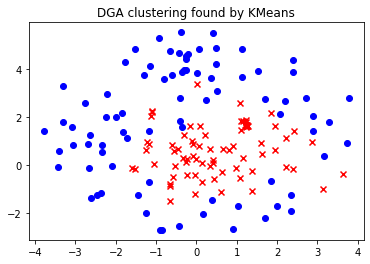

In [5]:
import sys
import re
import numpy as np

import csv
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate 
import os
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

#minimum lenght of a dns name
MIN_LEN=10

random_state = 170

def load_alexa(filename):
    domain_list=[]
    csv_reader = csv.reader(open(filename))
    for row in csv_reader:
        domain=row[1]
        #print(domain)
        if len(domain) >= MIN_LEN:
            domain_list.append(domain)
    return domain_list

def domain2ver(domain):
    ver=[]
    for i in range(0,len(domain)):
        ver.append([ord(domain[i])])
    return ver


def load_dga(filename):
    domain_list=[]
    with open(filename) as f:
        for line in f:
            domain=line.split(",")[0]
            if len(domain) >= MIN_LEN:
                domain_list.append(domain)
    return domain_list


#load dns data
x1_domain_list = load_alexa("./dga/top-100.csv")
x2_domain_list = load_dga("./dga/dga-cryptolocke-50.txt")
x3_domain_list = load_dga("./dga/dga-post-tovar-goz-50.txt")

x_domain_list=np.concatenate((x1_domain_list, x2_domain_list,x3_domain_list))

y1=[0]*len(x1_domain_list)
y2=[1]*len(x2_domain_list)
y3=[1]*len(x3_domain_list)

y=np.concatenate((y1, y2,y3))

cv = CountVectorizer(ngram_range=(2, 2), decode_error="ignore",
                                      token_pattern=r"\w", min_df=1)
x= cv.fit_transform(x_domain_list).toarray()

# apply KMeans and TSNE 
k_means = KMeans(n_clusters = 2, random_state=170)
k_means.fit(x)
y_pred = k_means.fit_predict(x)
#print(x.shape)

k_means_labels = k_means.labels_
#print(k_means_labels)

k_means_cluster_centers = k_means.cluster_centers_
#print(k_means_cluster_centers)

#reduce dimensionality to 2 to visualize the clusters found
tsne = TSNE(learning_rate=100, random_state=170)
tsne.fit(x)
tsne_data = tsne.fit_transform(x)

#print the data shape before and after TSNE
print('before TSNE:',x.shape)
acc = np.mean(y_pred == y)*100
print('accuracy:',acc)
print('after TSNE:',tsne_data.shape)

#cluster visualization
for i,label in enumerate(tsne_data):
    x1,x2=tsne_data[i]
    if y_pred[i] == 1:
        plt.scatter(x1,x2,marker='x', color='r')
    else:
        plt.scatter(x1, x2,marker='o', color='b')
plt.title('DGA clustering found by KMeans')
plt.show()